<a href="https://colab.research.google.com/github/sanaharora/EDATheoryDA/blob/main/DA_2d_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Sample dataset loading
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Example for Categorical-Categorical
contingency_cat_cat = pd.crosstab(df['gender'], df['class'], margins=True)
print(contingency_cat_cat)

# Example for Numerical-Numerical (using correlation as a contingency)
numeric_columns = ['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic']
# Changed 'body_fat_%' to 'body fat_%' to match the column name in the dataset

correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Example for Categorical-Numerical (using groupby)
cat_num_contingency = df.groupby('gender')[numeric_columns].mean()
print(cat_num_contingency)


class   ?     A     B     C     D    All
gender                                  
F       0  1484  1185  1112  1145   4926
M       1  1864  2162  2235  2204   8466
All     1  3348  3347  3347  3349  13392
            height_cm  weight_kg  body fat_%  diastolic  systolic
height_cm    1.000000   0.734909   -0.515452   0.145933  0.210170
weight_kg    0.734909   1.000000   -0.084073   0.262317  0.338888
body fat_%  -0.515452  -0.084073    1.000000   0.048059 -0.030411
diastolic    0.145933   0.262317    0.048059   1.000000  0.676391
systolic     0.210170   0.338888   -0.030411   0.676391  1.000000
         height_cm  weight_kg  body fat_%  diastolic    systolic
gender                                                          
F       160.485404  56.905899   28.486085  75.578197  123.986399
M       173.258505  73.581224   20.187534  80.667836  133.868269


In [4]:
# Example for 3-way contingency table
# Changed 'body_fat_%' to 'body fat_%' to match the column name in the dataset
contingency_3_way = pd.crosstab([df['gender'], df['class']], df['body fat_%'], margins=True)
print(contingency_3_way)


body fat_%    3.0  3.5  4.0  4.5  4.7  4.9  5.0  5.5  5.6  5.8  ...  49.2  \
gender class                                                    ...         
F      A        0    0    0    0    0    0    0    0    0    0  ...     0   
       B        0    0    0    0    0    0    0    0    0    0  ...     0   
       C        0    0    0    0    0    0    0    0    0    0  ...     0   
       D        0    1    0    0    0    0    0    0    0    0  ...     1   
M      ?        0    0    0    0    0    0    0    0    0    0  ...     0   
       A        2    0    0    1    0    1    0    2    1    0  ...     0   
       B        0    0    0    0    1    1    1    1    0    1  ...     0   
       C        0    1    1    0    0    0    0    0    0    1  ...     0   
       D        0    1    0    0    0    1    0    0    0    0  ...     0   
All             2    3    1    1    1    3    1    3    1    2  ...     1   

body fat_%    49.3  49.8  50.2  50.3  50.6  53.5  54.9  78.4    All  
gende

In [5]:
from scipy.stats import chi2_contingency

# Apply Chi-Square on a 2-way contingency table
chi2, p, dof, expected = chi2_contingency(contingency_cat_cat)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

# Row Profile (row percentage)
row_profile = contingency_cat_cat.div(contingency_cat_cat.sum(axis=1), axis=0) * 100
print("Row Profile:\n", row_profile)

# Column Profile (column percentage)
column_profile = contingency_cat_cat.div(contingency_cat_cat.sum(axis=0), axis=1) * 100
print("Column Profile:\n", column_profile)

# Relative Frequency (whole table)
relative_frequency = contingency_cat_cat.div(contingency_cat_cat.sum().sum())
print("Relative Frequency:\n", relative_frequency)


Chi-Square Statistic: 113.13651825938874, p-value: 1.2417736527556109e-19, Degrees of Freedom: 10
Row Profile:
 class          ?          A          B          C          D   All
gender                                                            
F       0.000000  15.062931  12.028015  11.287048  11.622006  50.0
M       0.005906  11.008741  12.768722  13.199858  13.016773  50.0
All     0.003734  12.500000  12.496266  12.496266  12.503734  50.0
Column Profile:
 class      ?          A         B          C          D        All
gender                                                            
F        0.0  22.162485  17.70242  16.611891  17.094655  18.391577
M       50.0  27.837515  32.29758  33.388109  32.905345  31.608423
All     50.0  50.000000  50.00000  50.000000  50.000000  50.000000
Relative Frequency:
 class          ?         A         B         C         D       All
gender                                                            
F       0.000000  0.027703  0.022121  0.020759

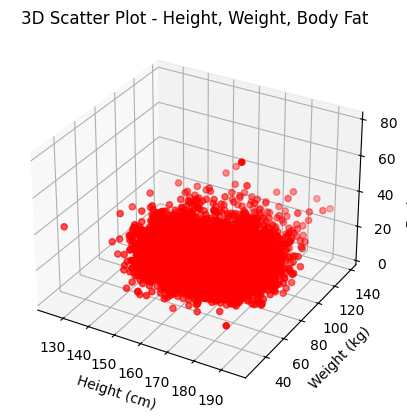

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Scatter plot for three variables (height_cm, weight_kg, body fat_%)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
# Changed 'body_fat_%' to 'body fat_%' to match the column name in the dataset
ax.scatter(df['height_cm'], df['weight_kg'], df['body fat_%'], c='r', marker='o')
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Body Fat (%)')
plt.title('3D Scatter Plot - Height, Weight, Body Fat')
plt.show()


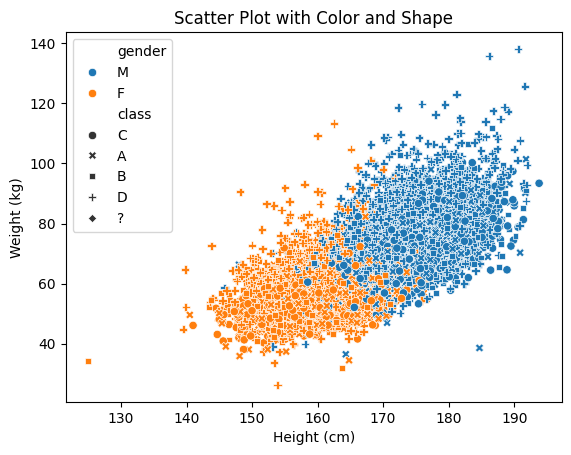

In [9]:
import seaborn as sns
sns.scatterplot(x='height_cm', y='weight_kg', hue='gender', style='class', data=df)
plt.title('Scatter Plot with Color and Shape')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

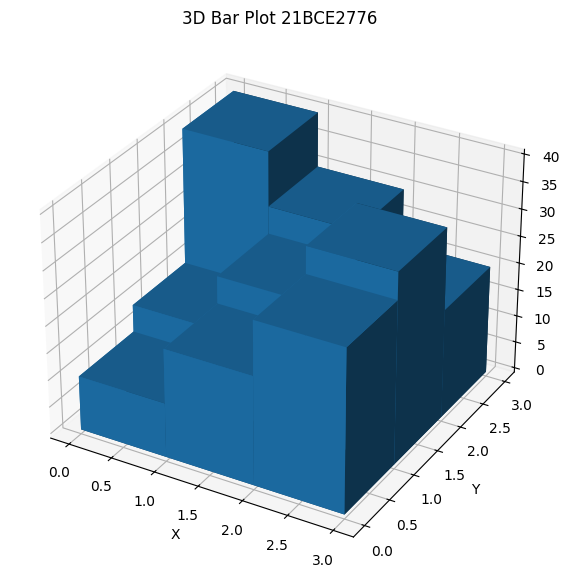

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D Bar plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

_x = np.arange(3)
_y = np.arange(3)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = [10, 20, 30, 15, 25, 35, 40, 30, 20]
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, top, shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Bar Plot 21BCE2776')
plt.show()

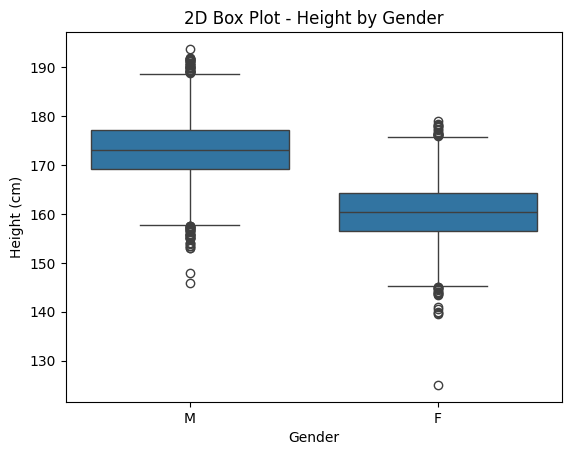

In [12]:
sns.boxplot(x='gender', y='height_cm', data=df)
plt.title('2D Box Plot - Height by Gender')
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.show()


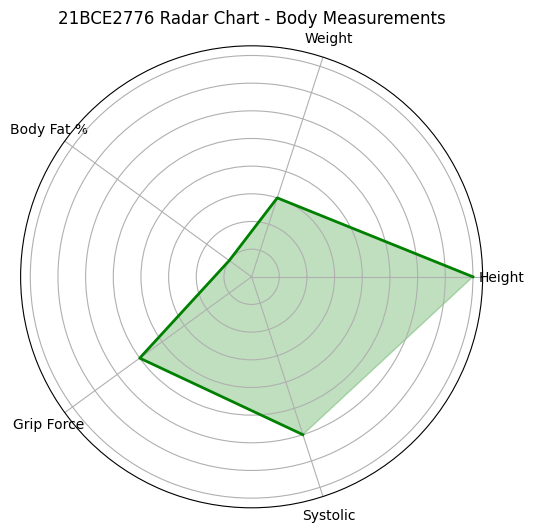

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Example of creating a radar chart
labels = np.array(['Height', 'Weight', 'Body Fat %', 'Grip Force', 'Systolic'])
values = np.array([160, 60, 20, 100, 120])

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='green', alpha=0.25)
ax.plot(angles, values, color='green', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=10)

plt.title("21BCE2776 Radar Chart - Body Measurements")
plt.show()
